## Observations and Insights

In this study, we were able to compare 10 drugs, ultimately comparing the most promising 4. From the calculations below, Capomulin and Ramicane perform with similar efficacy, being the only two drugs ending tumor averages below 45 mm3. Ultimately, Capomulin has the most potential with the lowest IQR, indicating the least variance in outcomes.

When looking at the individual mouse, there is a consistent decrease in tumor volume, which corresponds to the Capomulin data.

There is a strong correlation between the weight of the mouse and the size of the tumor. 

All studies have similar data sizes and there is an even distribution of male vs female mice. This would indicate that the trial was conducted fairly.




## Dependencies and starter code

In [52]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_study = pd.merge(study_results, mouse_metadata, on='Mouse ID')
#combined_study.head()

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
#volume for each regimen

study_trim=combined_study[['Drug Regimen','Mouse ID','Tumor Volume (mm3)']]


vol_agg = study_trim.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])

vol_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

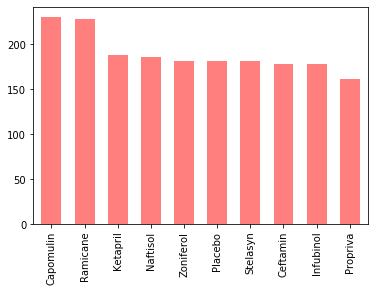

In [54]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas++

study_trim1 =combined_study[['Drug Regimen','Tumor Volume (mm3)']]

reg_agg = study_trim1['Drug Regimen'].value_counts()
reg_agg
reg_agg.plot.bar(color='red', alpha = .5, width = .6)


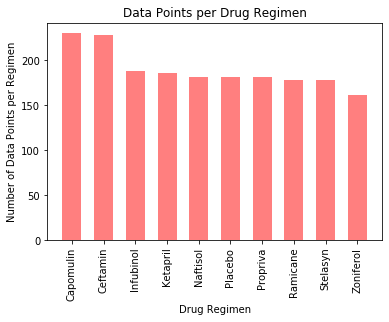

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot+
counts = study_trim['Drug Regimen'].value_counts()
counts

x=counts.index.sort_values()
plt.bar(x, counts,color='red', alpha=.5, align= "center", width=.6)
plt.xticks(rotation=90)
plt.title("Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points per Regimen")
plt.show()



## Pie plots

In [10]:
labels = ['Male','Female']
colors = ['green','orange']
explode = (.1, 0)

In [11]:
sex = combined_study['Sex'].value_counts()
sex

Male      958
Female    935
Name: Sex, dtype: int64

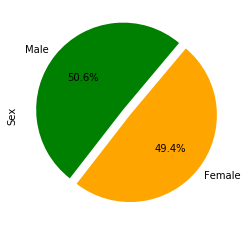

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

combined_study['Sex'].value_counts().plot(kind='pie',explode=explode, labels = labels, 
                                          colors=colors, startangle=50,autopct="%1.1f%%", )


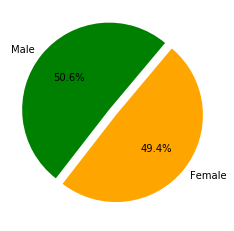

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, explode=explode, labels = labels, colors=colors, startangle=50,autopct="%1.1f%%")
plt.show()

## Quartiles, outliers and boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.
#Capomulin, Ramicane, Infubinol, and Ceftamin


mice = combined_study.groupby(['Drug Regimen','Mouse ID']).last()
mice.reset_index(level=0, inplace = True)
mice

Capomulin=mice[mice['Drug Regimen']=="Capomulin"]
Capomulin
cap_tumor = Capomulin['Tumor Volume (mm3)']
cap_tumor

Ramicane=mice[mice['Drug Regimen'] == "Ramicane"]
ram_tumor = Ramicane['Tumor Volume (mm3)']
ram_tumor

Infubinol=mice[mice['Drug Regimen'] == "Infubinol"]
inf_tumor = Infubinol['Tumor Volume (mm3)']
inf_tumor

Ceftamin=mice[mice['Drug Regimen'] == "Ceftamin"]
cef_tumor = Ceftamin['Tumor Volume (mm3)']
cef_tumor

# If the data is in a dataframe, we use pandas to give quartile calculations

tumor_data = [cap_tumor, ram_tumor, inf_tumor, cef_tumor]

    

quartiles = cap_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'Capomulin Study')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'--------------------------------------')    
    
quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'Ramicane Study')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'--------------------------------------')    

quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'Infubinol Study')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'--------------------------------------') 

quartiles = cef_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f'Ceftamin Study')
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f'--------------------------------------')

Capomulin Study
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------------------------
Ramicane Study
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
--------------------------------------
Infubinol Study
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be out

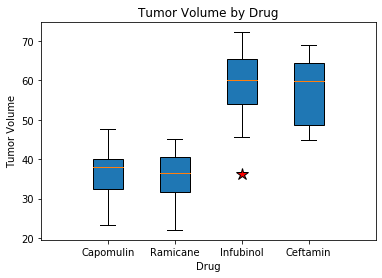

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin, Ramicane, Infubinol, and Ceftamin


tumor_data = [cap_tumor, ram_tumor, inf_tumor, cef_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug')
ax1.set_xlim(0, len(tumor_data)+1)
ax1.set_xlabel('Drug')
ax1.set_ylabel('Tumor Volume')
flierprops = dict(marker='*', markerfacecolor='r', markersize=12,
                  linestyle='none')
ax1.boxplot(tumor_data, labels=['Capomulin','Ramicane','Infubinol','Ceftamin'], patch_artist=True,showfliers=True, flierprops=flierprops)

plt.show()




## Line and scatter plots

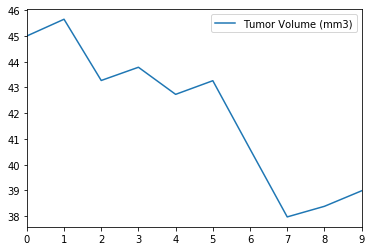

In [51]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

drug1=mice[mice['Drug Regimen']=="Capomulin"]
drug1
tumor = drug1['Tumor Volume (mm3)']


mouse1 = combined_study.groupby('Mouse ID')
mouse1.head()

cap_mouse = combined_study[combined_study['Mouse ID']=='b128']
cap_mouse = cap_mouse[['Mouse ID','Tumor Volume (mm3)']]

cap_mouse.plot(x_compat=True); plt.legend(loc='best')


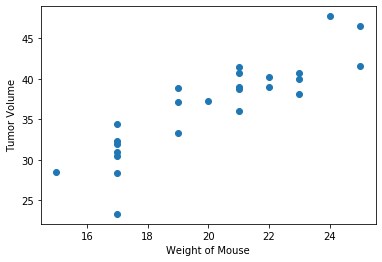

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_weight = Capomulin['Weight (g)']
cap_weight

plt.scatter(cap_weight, cap_tumor)
plt.xlabel('Weight of Mouse')
plt.ylabel('Tumor Volume')
plt.show()

The r-squared is: 0.8767060403658119


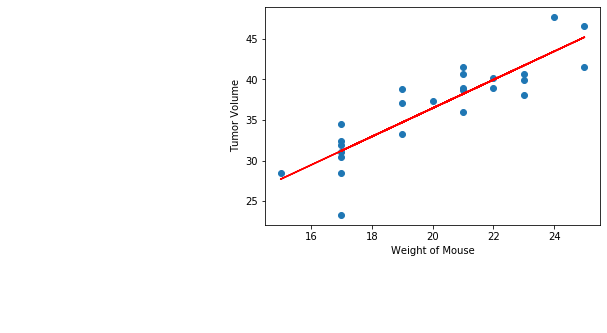

In [32]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
#for the Capomulin regimen


x_value= Capomulin['Weight (g)']
y_value= Capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.xlabel('Weight of Mouse')
plt.ylabel('Tumor Volume')
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq, (6,10),fontsize=15,color="green")
print(f"The r-squared is: {rvalue}")
plt.show()
